In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fn = 'dump.sqlite'
points = pd.read_sql('select * from points where not banned', sqlite3.connect(fn))


In [3]:
points[points.wait == 0]

,id,lat,lon,rating,country,wait,name,comment,datetime,reviewed,banned,ip,dest_lat,dest_lon,signal
13718,13723,48.075000,18.652154,2.0,SK,0.0,Azarjahu (Hitchwiki),None,2011-06-15 11:27:49.000000,1,0,,NaN,NaN,None
15123,15128,50.901088,4.331057,4.0,BE,0.0,Robbel (Hitchwiki),None,2011-12-05 19:41:07.000000,1,0,,NaN,NaN,None
16381,16386,52.064783,5.129467,1.0,NL,0.0,CK (Hitchwiki),None,2012-05-22 19:03:54.000000,1,0,,NaN,NaN,None
22251,22259,47.265482,-1.598674,4.0,FR,0.0,Unrooted (Hitchwiki),None,2013-09-18 16:38:25.000000,1,0,,NaN,NaN,None
26010,26018,63.069959,8.241321,5.0,NO,0.0,(Julian) (Hitchwiki),None,2014-10-20 05:40:23.000000,1,0,,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54860,6481399712741532962,43.158369,-1.247479,3.0,FR,0.0,None,Got a free taxi while walking along the road.,2024-03-06 21:22:53.424985,0,0,,43.092684,-1.299820,None
54925,1157139202768468700,42.361342,19.330970,5.0,ME,0.0,J513,"As of March 8 2023, the main road from Albania...",2024-03-09 17:29:16.896578,0,0,,42.275221,19.432046,None
55131,4013384247075936520,46.212421,20.762726,4.0,RO,0.0,Zenit,"Arriving from Budapest, we got dropped off by ...",2024-03-29 18:00:34.615400,0,0,,45.704261,21.209106,ask
55138,962476935490909660,56.203305,-4.710724,5.0,GB,0.0,None,We got off the car that dropped us to Tarbet a...,2024-03-30 00:38:18.462397,0,0,,56.670299,-5.079776,thumb


In [3]:
# unnecessary/ unknown features
points = points.drop(columns=['banned','ip'])

# fokus on basic features
points = points[['lat', 'lon', 'wait']]
points = points.dropna()

In [4]:
waiting_time_per_point = points.groupby(["lat", "lon"]).mean()

In [5]:
# splitting 60-20-20
train, test = train_test_split(waiting_time_per_point, test_size=0.2, random_state=42)
train.to_csv("data/points_train_val.csv", index=True) # for cross validation

train, val = train_test_split(train, test_size=0.25, random_state=42)

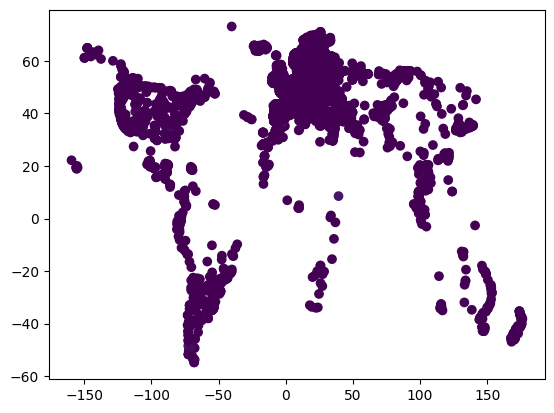

In [6]:
plt.scatter(train.index.get_level_values('lon'), train.index.get_level_values('lat'), c=train['wait'], cmap='viridis')

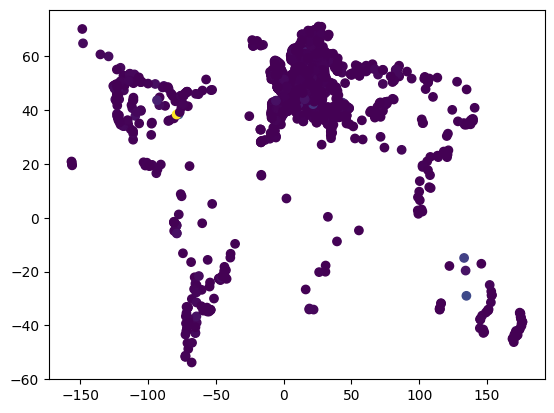

In [7]:
plt.scatter(val.index.get_level_values('lon'), val.index.get_level_values('lat'), c=val['wait'], cmap='viridis')

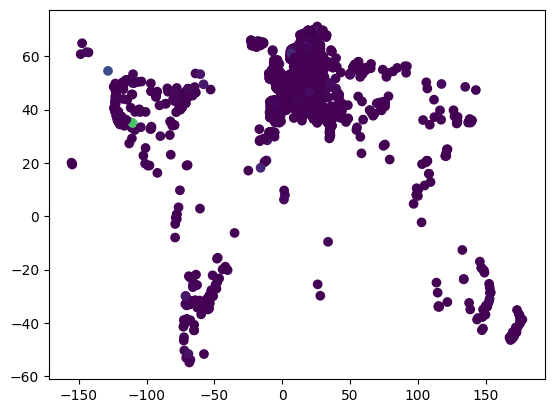

In [8]:
plt.scatter(test.index.get_level_values('lon'), test.index.get_level_values('lat'), c=test['wait'], cmap='viridis')

In [9]:
waiting_time_per_point.to_csv("data/points.csv", index=True)

train.to_csv("data/points_train.csv", index=True)
train.to_csv("data/train.csv", index=True)
val.to_csv("data/points_val.csv", index=True)
test.to_csv("data/points_test.csv", index=True)

In [10]:
len(train), len(val), len(test)

(10008, 3336, 3336)

In [11]:
# kaggle
val['Usage'] = 'Public'
test['Usage'] = 'Private'
kaggle_test = pd.concat([val, test])
kaggle_test.to_csv("data/test.csv", index=True)

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [12]:
train['id'] = train.index
test['id'] = test.index

train = train[['id', 'lat', 'lon', 'wait']]
solution = test[['id', 'wait', 'Usage']]
test = test[['id', 'lat', 'lon']]

In [13]:
train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)
solution.to_csv("data/solution.csv", index=False)

In [14]:
train[['id', 'wait']].to_csv("data/sample_submission.csv", index=False)